# Search for Commensurate Primitive Cells within an Angular Interval
In this example, Nookiin is used to explore a bilayer system where the relative rotation angle between layers varies within a given interval. The goal is to find commensurate primitive cells (PCs) for different angle values, provided that the deformation required to achieve such commensurability in both layers remains below a specified threshold, $\varepsilon$.

This procedure is useful for analyzing how structural compatibility between layers changes as a function of the rotation angle, which is fundamental in the study of phenomena such as moiré patterns, band engineering, and the modulation of electronic properties in stacked two-dimensional systems.

The process involves:

- Generating the system for various angles within the specified interval.

- Searching for commensurate solutions with deformations within the allowed limit.

- Saving in POSCAR files those configurations that meet the established criteria.

- Saving the information about the found solutions in a text file.

This example highlights one of Nookiin’s core functionalities: automating the search for efficient supercells to study interlayer-rotated heterostructures, thereby accelerating the design and characterization of unconventional materials.

### Loading the System and Creating the Lattices
The loading of the required functions is done by importing nookiin and therefore all the functions from nookiin.system, for this it is necessary to have already installed nookiin using the command `pip install .` from the console.

In [1]:
import sys
import os
import io

import nookiin
from nookiin.system import *

Load System
Nookiin Ready-to-work


In [2]:
VASP_Files = os.path.abspath(os.path.join(os.getcwd(), '..', '..', 'VASP_Files'))
G=importLattice(VASP_Files+'/01-graphene')
WS2=importLattice(VASP_Files+'/02-ws2')
G.name='G'
WS2.name='WS2'
G.inAngle=119 #With this we prevent the program from returning only hexagonal networks

File 'C:\SS\Nook’iin\Nook-iin\VASP_Files/01-graphene.vasp' will be read
--Lattice created successfully
File 'C:\SS\Nook’iin\Nook-iin\VASP_Files/02-ws2.vasp' will be read
--Lattice created successfully


### Function that searches for rotated systems that meet the requirements.

In [3]:
def exploreSystems(L1,L2,tetas):
    ts=tetas.copy()
    Systems=[]
    orig = len(ts)
    i = 0
    errs = 0
    ep = 0.01
    m = 15
    pathS = os.path.join(os.getcwd(), 'VASP_Files/Systems-explored')
    pathT = os.path.join(os.getcwd(), 'VASP_Files/Systems-explored/Tables')
    if not os.path.exists(pathS):
        print("Create folder Systems-explored")
        os.makedirs(pathS)
    if not os.path.exists(pathT):
        print("Create folder Tables")
        os.makedirs(pathT)
    print("Exploring....")
    # Prevents printouts on screen
    old_stdout = sys.stdout
    sys.stdout = io.StringIO()  # redirigir prints a un buffer temporal
    for t in ts:
        i+=1
        if i==orig:
            # Perform a more refined search
            ep = 0.002
            m = 20
        s = System([L1,L2.mRot(t)])
        so = s.generateSuperCell(RoS=m, eps=ep,showTable=False,prntRes=False)
        if so is not None:
            newt = cRot(so.redes[1].a)
            newName = f'{L1.name}-{L2.name}({newt:.4f})'
            if round(newt,5) not in ts:
                ts.append(round(newt,5))
                sAux=System([L1,L2.mRot(newt)])
                T = so.MT
                so=sAux.optimize_system(T,prnt=False)
                Systems.append([so,sAux])
                na=so.primitive_lattice.nOAtms()
                so.exportPC(PCname=f'Systems-explored/{na}atms_{newName}')
                sAux.describeTM(T,prnt=f'Systems-explored/Tables/{newName}',shw=False)
        else:
            sys.stdout = old_stdout
            print(f'*****No in theta={t}')
            errs+=1
    sys.stdout = old_stdout
    print(f'Finished. {i} angles explored, {errs} errors, {len(Systems)} systems found.\nResults saved in {pathS}')
    return Systems

#### Create the list of angles to be explored

In [4]:
minAng=0.02
maxAng=10
angs=[]
for i in range(int(minAng*100),int(maxAng*100)):
    angs.append(i/100)
print(f"Range:[{minAng},{maxAng}]")

Range:[0.02,10]


#### Exploration

In [5]:
Smts=exploreSystems(WS2,G,angs)

Create folder Systems-explored
Create folder Tables
Exploring....
Finished. 1071 angles explored, 0 errors, 73 systems found.
Results saved in C:\SS\Nook’iin\Nook-iin\Examples\English\VASP_Files/Systems-explored


#### Sample of some of the results obtained

Size of the primitive vectors: |a|=48.90181Å, |b|=48.90181Å
Angle between vectors: 120.000°
+-------------------------+---------------+-----------------------+-----------------------+--------+
|         Lattice         |       T       |      Deformation      |    Distortion:δ//θ    | #Atoms |
+-------------------------+---------------+-----------------------+-----------------------+--------+
|                         |  |   9    9|  |  | 1.00000  0.00000|  |    +0.0% // +0.0°     |  729   |
|           WS2           |  |  -9   18|  |  | 0.00000  1.00000|  |    +0.0% // +0.0°     |        |
|                         |               |                       |                       |        |
|                         |  |  11   12|  |  | 1.00317 -0.00000|  |   +0.317% // -0.0°    |  794   |
|        G(1.44°)         |  | -12   23|  |  |-0.00000  1.00317|  |   +0.317% // +0.0°    |        |
|                         |               |                       |                       |        |

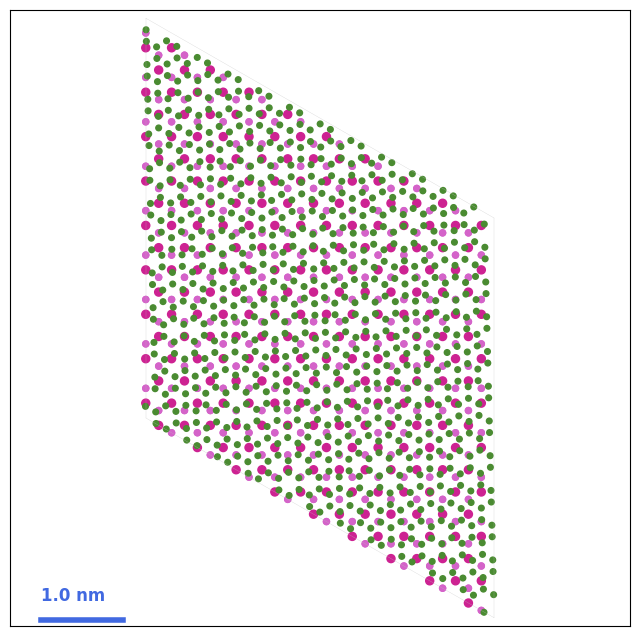

In [10]:
Smts[5][1].describeTM(Smts[5][1].MT)
Smts[5][0].primitive_lattice.showme(t=5)

Size of the primitive vectors: |a|=48.29432Å, |b|=48.29431Å
Angle between vectors: 120.000°
+-------------------------+---------------+-----------------------+-----------------------+--------+
|         Lattice         |       T       |      Deformation      |    Distortion:δ//θ    | #Atoms |
+-------------------------+---------------+-----------------------+-----------------------+--------+
|                         |  |  13    4|  |  | 1.00000  0.00000|  |    +0.0% // +0.0°     |  711   |
|           WS2           |  |  -4   17|  |  | 0.00000  1.00000|  |    +0.0% // +0.0°     |        |
|                         |               |                       |                       |        |
|                         |  |  16    6|  |  | 1.00213 -0.00000|  |   +0.213% // -0.0°    |  776   |
|        G(2.29°)         |  |  -6   22|  |  |-0.00000  1.00213|  |   +0.213% // +0.0°    |        |
|                         |               |                       |                       |        |

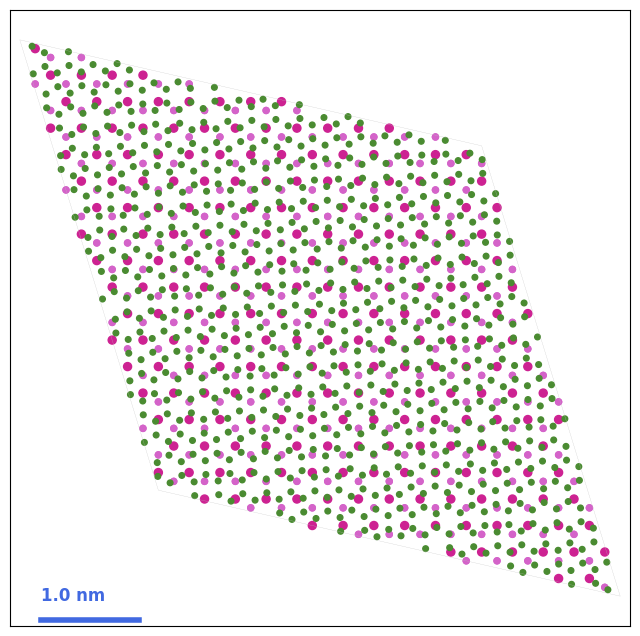

In [7]:
Smts[10][1].describeTM(Smts[10][1].MT)
Smts[10][0].primitive_lattice.showme(t=5)

Size of the primitive vectors: |a|=42.20473Å, |b|=42.20473Å
Angle between vectors: 120.000°
+-------------------------+---------------+-----------------------+-----------------------+--------+
|         Lattice         |       T       |      Deformation      |    Distortion:δ//θ    | #Atoms |
+-------------------------+---------------+-----------------------+-----------------------+--------+
|                         |  |   4   11|  |  | 1.00000  0.00000|  |    +0.0% // +0.0°     |  543   |
|           WS2           |  | -11   15|  |  | 0.00000  1.00000|  |    +0.0% // +0.0°     |        |
|                         |               |                       |                       |        |
|                         |  |   4   15|  |  | 0.99431 -0.00000|  |   -0.569% // +0.0°    |  602   |
|        G(3.40°)         |  | -15   19|  |  | 0.00000  0.99431|  |   -0.569% // +0.0°    |        |
|                         |               |                       |                       |        |

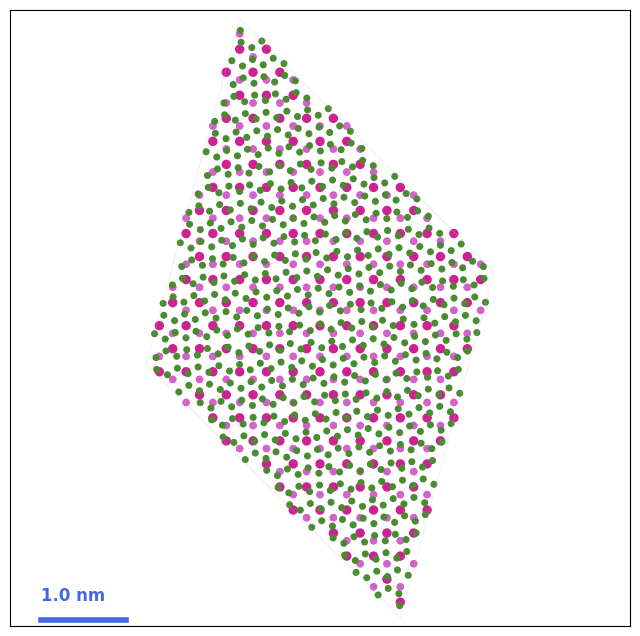

In [8]:
Smts[15][1].describeTM(Smts[15][1].MT)
Smts[15][0].primitive_lattice.showme(t=5)

Size of the primitive vectors: |a|=25.67789Å, |b|=25.67788Å
Angle between vectors: 120.000°
+-------------------------+---------------+-----------------------+-----------------------+--------+
|         Lattice         |       T       |      Deformation      |    Distortion:δ//θ    | #Atoms |
+-------------------------+---------------+-----------------------+-----------------------+--------+
|                         |  |   9   -2|  |  | 1.00000  0.00000|  |    +0.0% // +0.0°     |  201   |
|           WS2           |  |   2    7|  |  | 0.00000  1.00000|  |    +0.0% // +0.0°     |        |
|                         |               |                       |                       |        |
|                         |  |  11   -1|  |  | 0.99619 -0.00000|  |   -0.381% // +0.0°    |  222   |
|        G(7.50°)         |  |   1   10|  |  | 0.00000  0.99619|  |   -0.381% // +0.0°    |        |
|                         |               |                       |                       |        |

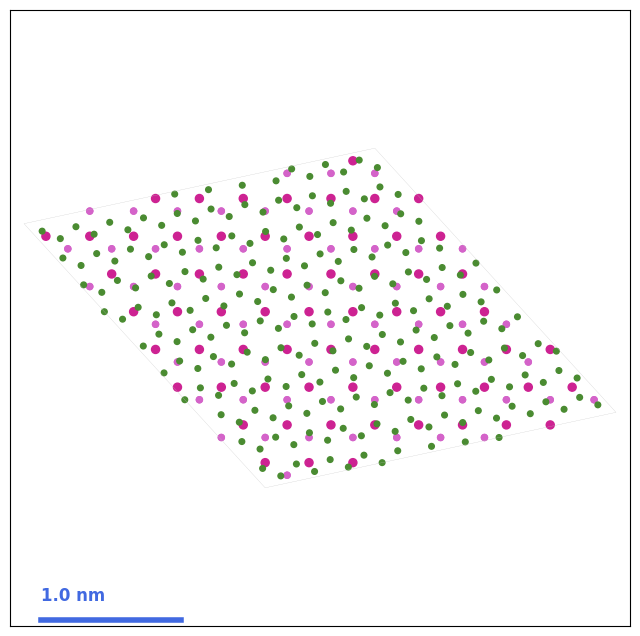

In [9]:
Smts[35][1].describeTM(Smts[35][1].MT)
Smts[35][0].primitive_lattice.showme(t=5)